In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
data = pd.read_csv('indian_liver_patient.csv')

In [31]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [33]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [34]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [35]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(0.947064)

In [36]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

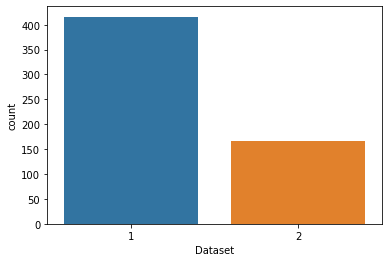

In [37]:
import seaborn as sns
sns.countplot('Dataset', data = data)

Here 2 means suffering with disease and 1 means not suffering with disease.

Replacing 2 with 1 and 1 with 0, for better understanding.

In [38]:
data['Dataset'] = data['Dataset'].replace([2,1],[1,0])
data['Dataset'].head()

0    0
1    0
2    0
3    0
4    0
Name: Dataset, dtype: int64

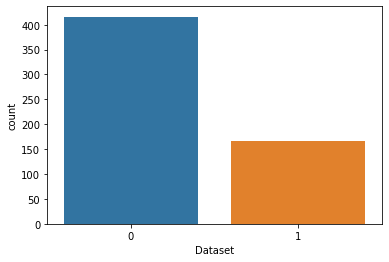

In [39]:
import seaborn as sns
sns.countplot('Dataset', data = data)

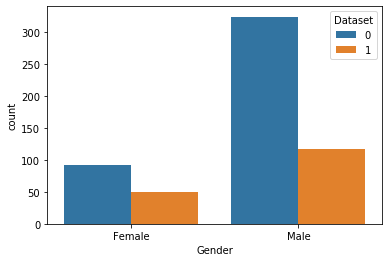

In [40]:
sns.countplot('Gender', data = data, hue = 'Dataset')

In [41]:
data = pd.get_dummies(data, columns = ['Gender'], drop_first = True)

In [42]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


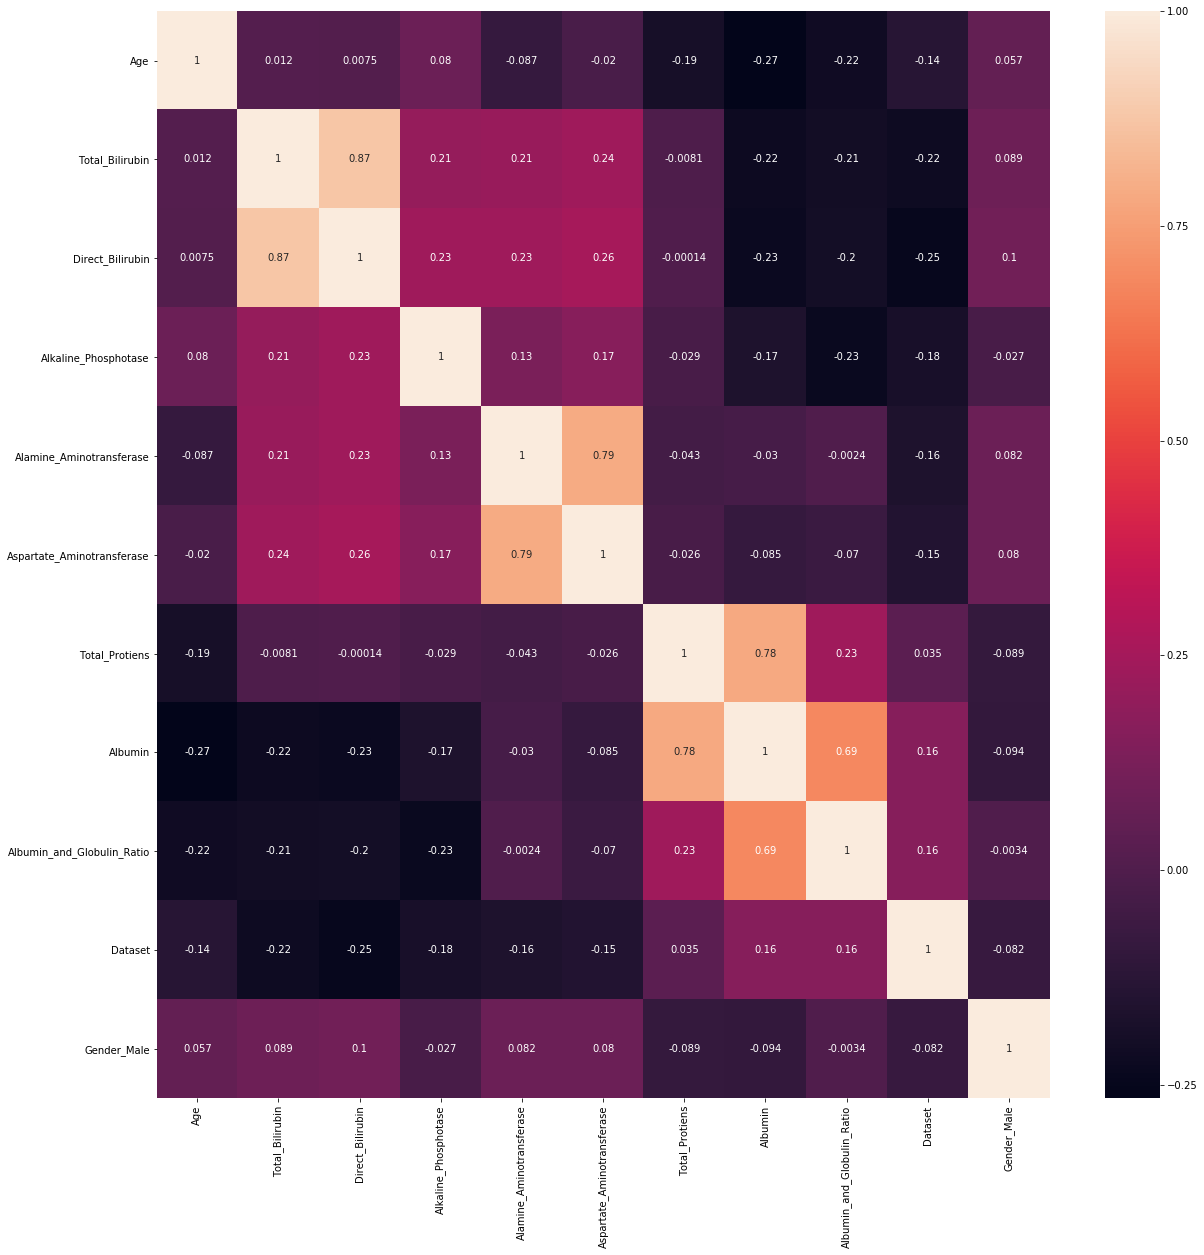

In [43]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True)

In [44]:
#sns.pairplot(data, hue = 'Dataset')

In [45]:
#data.corr()

In [46]:
X = data[['Albumin_and_Globulin_Ratio', 'Albumin', 'Total_Protiens', 'Aspartate_Aminotransferase', 'Alamine_Aminotransferase', 'Alkaline_Phosphotase', 'Age']]
#X = data.drop('Dataset', axis = 1)
y = data['Dataset']

In [47]:
X.columns

Index(['Albumin_and_Globulin_Ratio', 'Albumin', 'Total_Protiens',
       'Aspartate_Aminotransferase', 'Alamine_Aminotransferase',
       'Alkaline_Phosphotase', 'Age'],
      dtype='object')

In [48]:
# from imblearn.combine import SMOTETomek
# smk = SMOTETomek(random_state = 42)
# X, y = smk.fit_sample(X,y)
# X.shape, y.shape

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [51]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (524, 7) (524,)
Test Set:  (59, 7) (59,)


In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [54]:
confusion_matrix(y_test, model.predict(X_test))

array([[44,  1],
       [10,  4]], dtype=int64)

In [55]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100,2)}")

Accuracy is 81.36


In [56]:
import pickle
pickle.dump(model, open('liver.pkl', 'wb'))

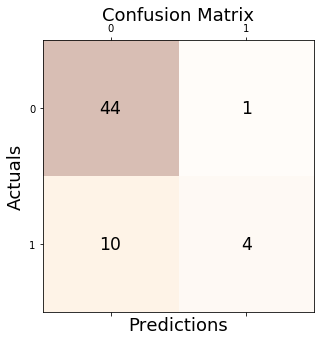

In [61]:
import matplotlib.pyplot as graph
from sklearn.metrics import confusion_matrix
mvmatrix = confusion_matrix(y_true=y_test, y_pred=model.predict(X_test))
fig, ax = graph.subplots(figsize=(5, 5))
ax.matshow(mvmatrix, cmap=graph.cm.Oranges, alpha=0.3)
for i in range(mvmatrix.shape[0]):
    for j in range(mvmatrix.shape[1]):
        ax.text(x=j, y=i,s=mvmatrix[i, j], va='center', ha='center', size='xx-large')
graph.xlabel('Predictions', fontsize=18)
graph.ylabel('Actuals', fontsize=18)
graph.title('Confusion Matrix', fontsize=18)
graph.show()

In [62]:
"""# Support Vector Machine"""

from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
print(f"Accuracy is {round(accuracy_score(y_test, svc.predict(X_test))*100,2)}%")

Accuracy is 76.27%


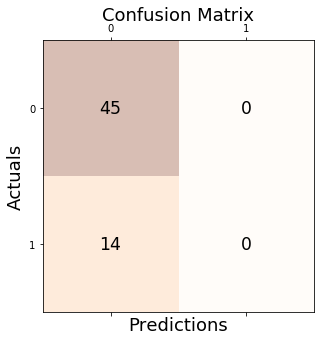

In [63]:
import matplotlib.pyplot as graph
from sklearn.metrics import confusion_matrix
mvmatrix = confusion_matrix(y_true=y_test, y_pred=svc.predict(X_test))
fig, ax = graph.subplots(figsize=(5, 5))
ax.matshow(mvmatrix, cmap=graph.cm.Oranges, alpha=0.3)
for i in range(mvmatrix.shape[0]):
    for j in range(mvmatrix.shape[1]):
        ax.text(x=j, y=i,s=mvmatrix[i, j], va='center', ha='center', size='xx-large')
graph.xlabel('Predictions', fontsize=18)
graph.ylabel('Actuals', fontsize=18)
graph.title('Confusion Matrix', fontsize=18)
graph.show()

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print(f"Accuracy is {round(accuracy_score(y_test, dtree.predict(X_test))*100,2)}%")

Accuracy is 66.1%


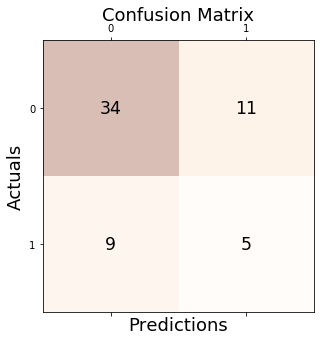

In [66]:
import matplotlib.pyplot as graph
from sklearn.metrics import confusion_matrix
mvmatrix = confusion_matrix(y_true=y_test, y_pred=dtree.predict(X_test))
fig, ax = graph.subplots(figsize=(5, 5))
ax.matshow(mvmatrix, cmap=graph.cm.Oranges, alpha=0.3)
for i in range(mvmatrix.shape[0]):
    for j in range(mvmatrix.shape[1]):
        ax.text(x=j, y=i,s=mvmatrix[i, j], va='center', ha='center', size='xx-large')
graph.xlabel('Predictions', fontsize=18)
graph.ylabel('Actuals', fontsize=18)
graph.title('Confusion Matrix', fontsize=18)
graph.show()

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
print(f"Accuracy is {round(accuracy_score(y_test, knn.predict(X_test))*100,2)}%")

Accuracy is 76.27%


C:\Users\Mrida\anaconda3\envs\myra\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


C:\Users\Mrida\anaconda3\envs\myra\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


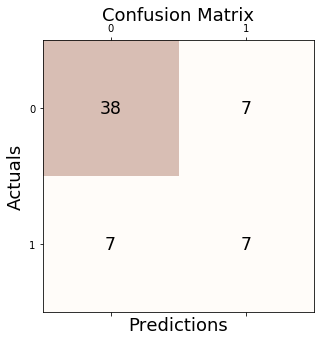

In [68]:
import matplotlib.pyplot as graph
from sklearn.metrics import confusion_matrix
mvmatrix = confusion_matrix(y_true=y_test, y_pred=knn.predict(X_test))
fig, ax = graph.subplots(figsize=(5, 5))
ax.matshow(mvmatrix, cmap=graph.cm.Oranges, alpha=0.3)
for i in range(mvmatrix.shape[0]):
    for j in range(mvmatrix.shape[1]):
        ax.text(x=j, y=i,s=mvmatrix[i, j], va='center', ha='center', size='xx-large')
graph.xlabel('Predictions', fontsize=18)
graph.ylabel('Actuals', fontsize=18)
graph.title('Confusion Matrix', fontsize=18)
graph.show()

In [70]:
 from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
    #clf=linear_model.LogisticRegression(fit_intercept=False)
clf.fit(X_train,y_train)
print(f"Accuracy is {round(accuracy_score(y_test, clf.predict(X_test))*100,2)}%")

Accuracy is 45.76%


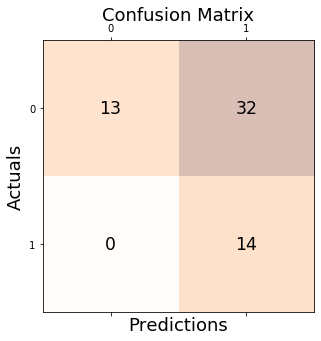

In [71]:
import matplotlib.pyplot as graph
from sklearn.metrics import confusion_matrix
mvmatrix = confusion_matrix(y_true=y_test, y_pred=clf.predict(X_test))
fig, ax = graph.subplots(figsize=(5, 5))
ax.matshow(mvmatrix, cmap=graph.cm.Oranges, alpha=0.3)
for i in range(mvmatrix.shape[0]):
    for j in range(mvmatrix.shape[1]):
        ax.text(x=j, y=i,s=mvmatrix[i, j], va='center', ha='center', size='xx-large')
graph.xlabel('Predictions', fontsize=18)
graph.ylabel('Actuals', fontsize=18)
graph.title('Confusion Matrix', fontsize=18)
graph.show()